# 1) Using TF-IDF

## Loading Dataset

In [93]:
import pandas as pd

In [94]:
file_path = r"Z:\BD\Novumgen\Data\Business Analysis\Backup\Nisarg\Learning\DataBase\Sentiment Analysis Dataset\Reviews.csv"
df = pd.read_csv(file_path)

In [95]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [97]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


In [98]:
df['Score'].value_counts(ascending=False)

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

## Label Sentiment

In [99]:
def label_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating >= 4:
        return 'Positive'
    else:
        return 'Neutral'

In [100]:
df['Sentiment'] = df['Score'].apply(label_sentiment)

In [101]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
433523,433524,B00473NLIO,A1SZ66QDEODEQ8,"J. Hansen ""Jan H""",0,1,5,1302912000,Yummy!,I love this barbecue sauce! I cannot find it ...,Positive
561483,561484,B000O393QK,A1R5TFXVMFQ1P1,alsugarbelle,0,0,5,1218585600,Great tea!,I bought my Tassimo system on ebay and I was d...,Positive
520715,520716,B002WWLJQ8,A15SMN6DNQ3D1D,jc,0,0,5,1327449600,great in protein drinks,I like to work out and loose weight the easies...,Positive
16074,16075,B0054TWQ2C,A224KM22RQ5CD4,Amazon_Junkie,0,0,3,1329782400,Lacks flavor,I've been a fan of Nong Shim spicy noodles for...,Neutral
194497,194498,B003ZT61E2,AN4HRAGRHHX1H,"Heather Harris ""ATitus2Woman""",0,0,5,1320537600,peppermint mocha maxwell house,Totally yummy pepperminty flavor! I have been...,Positive


In [10]:
df['Sentiment'].value_counts()

Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64

## Text Cleaning

In [11]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janinisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\janinisa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
stopwords.fileids()

['albanian',
 'arabic',
 'azerbaijani',
 'basque',
 'belarusian',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'tamil',
 'turkish']

In [13]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|<.*?>','',text) #replace 3 patters with null. http\S+ , www/S+ , <.*?>
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

## text = re.sub(r'http\S+|www\S+|<.*?>','',text) - replace 3 patters with null. http\S+ , www/S+ , <.*?>
### http\S+
#### Matches any substring starting with "http" followed by one or more non-space characters (\S+).
#### example: http://example.com, https://abc.xyz

### www/S+
#### Matches substrings starting with "www" followed by non-space characters.
#### example: www.google.com, www.test.org

### <.*?>
#### Matches HTML tags (anything between < and >). The .*? is a non-greedy match (captures minimal text between < and >).
#### example: &lt;p&gt;, &lt;a href="link"&gt;, &lt;b&gt;

## text = text.translate(str.maketrans('', '', string.punctuation))

### .maketrans()
#### provides the translation rule
#### .maketrans(x,y,z) x=Characters to be replaced, y=Characters to replace them with, z =Characters to delete completely
#### string.punctuation → all punctuation characters

### .translate()
#### uses that rule to modify the text

In [14]:
df['cleaned_text'] = df['Text'].apply(clean_text)

In [15]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,cleaned_text
277932,277933,B000WFKI82,A3SDS1ZRAFSKBG,FarahJoan,3,4,4,1331078400,Terrible Delivery from Amazon,We usually order this from Petco because our c...,Positive,usually order petco cat health problem eat spe...
241594,241595,B0081XPTBS,A25SPTJVZ8DT1Z,"Bboy360 ""Image is Everything""",2,3,4,1338336000,I guess this is the best one,"The DHA and ARA doesn't bother me, I think peo...",Positive,dha ara doesnt bother think people overreactin...
158167,158168,B000VKA92I,A2OI4PFNCPTQ8V,Tina nagle,1,1,5,1345680000,This makes a visible difference in my dogs mot...,My dog is a rescue dog she was beaten almost t...,Positive,dog rescue dog beaten almost death kind person...
407952,407953,B00473JLA6,A3130BH1Z7OPD2,Bob Warner,3,3,5,1334534400,Kaffree Roma,Great way to leave Caffine behind . I used te...,Positive,great way leave caffine behind used teabags mi...
227715,227716,B001FSJCPK,AQZC15SPOD5AF,lololsn,0,0,5,1334534400,My cat loves the salmon flavor.,I have to give my cat 3 pills a day. Pill pock...,Positive,give cat 3 pill day pill pocket greatest use s...


## Text Vectorization (TF-IDF)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Sentiment']

In [27]:
type(y)

pandas.core.series.Series

In [25]:
type(X)

scipy.sparse._csr.csr_matrix

## Train-Test Split & Model Training

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.74      0.68      0.71     16407
     Neutral       0.53      0.21      0.30      8528
    Positive       0.90      0.97      0.93     88756

    accuracy                           0.87    113691
   macro avg       0.72      0.62      0.65    113691
weighted avg       0.85      0.87      0.85    113691



### visualizing confusion matrix

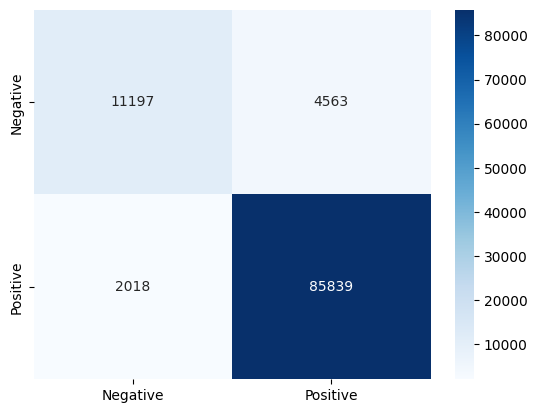

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['Negative','Positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues', xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.show()

## Predict on New Reviews

In [56]:
sample = ["The product quality is excellent and I love it!", 
          "It was good product."]
cleaned = [clean_text(x) for x in sample]
X_new = vectorizer.transform(cleaned)
pred = model.predict(X_new)
print(pred)

NameError: name 'clean_text' is not defined

# 2) Using BERT


   ------- --------------------------------  2/11 [multidict]
   -------------- -------------------------  4/11 [dill]
   -------------- -------------------------  4/11 [dill]
   -------------- -------------------------  4/11 [dill]
   -------------- -------------------------  4/11 [dill]
   -------------- -------------------------  4/11 [dill]
   ------------------ ---------------------  5/11 [aiohappyeyeballs]
   --------------------- ------------------  6/11 [yarl]
   ------------------------- --------------  7/11 [multiprocess]
   ------------------------- --------------  7/11 [multiprocess]
   ------------------------- --------------  7/11 [multiprocess]
   ------------------------- --------------  7/11 [multiprocess]
   -------------------------------- -------  9/11 [aiohttp]
   -------------------------------- -------  9/11 [aiohttp]
   -------------------------------- -------  9/11 [aiohttp]
   -------------------------------- -------  9/11 [aiohttp]
   -----------------------

In [102]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

## Load and Prepare Your Dataset

In [126]:
data =df[['Text','Sentiment']]

In [127]:
data.rename(columns={'Text':'review_text'},inplace=True)

C:\Users\janinisa\AppData\Local\Temp\ipykernel_3892\150988234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Text':'review_text'},inplace=True)


In [128]:
sentiment_map = {
    'Positive' : 1,
    'Negative' : 0,
    'Neutral' : 2
}

data['Sentiment'] = data['Sentiment'].map(sentiment_map).astype('int32')

C:\Users\janinisa\AppData\Local\Temp\ipykernel_3892\1218865742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment'].map(sentiment_map).astype('int32')


In [129]:
data.info(), data['Sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_text  568454 non-null  object
 1   Sentiment    568454 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 6.5+ MB


(None,
 Sentiment
 1    443777
 0     82037
 2     42640
 Name: count, dtype: int64)

## Sampling Data

In [130]:
from sklearn.utils import resample

# Keep class balance proportional
sample_size = 3000  # adjust between 1000–5000 depending on your CPU
data_sampled = data.groupby('Sentiment', group_keys=False).apply(
    lambda x: x.sample(frac=sample_size / len(data), random_state=42)
)

C:\Users\janinisa\AppData\Local\Temp\ipykernel_3892\3373112487.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_sampled = data.groupby('Sentiment', group_keys=False).apply(


In [131]:
data_sampled.info(), data_sampled['Sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 525327 to 183351
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  3000 non-null   object
 1   Sentiment    3000 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 58.6+ KB


(None,
 Sentiment
 1    2342
 0     433
 2     225
 Name: count, dtype: int64)

In [109]:
'''
data = pd.DataFrame({
    'review_text': [
        "This product is fantastic!",
        "Worst purchase ever.",
        "Average experience, nothing special.",
        "Loved it, highly recommend!"
    ],
    'sentiment': [1,0,2,1] # 1 = Positive, 0 = Negative, 2 = Neutral
})
'''

'\ndata = pd.DataFrame({\n    \'review_text\': [\n        "This product is fantastic!",\n        "Worst purchase ever.",\n        "Average experience, nothing special.",\n        "Loved it, highly recommend!"\n    ],\n    \'sentiment\': [1,0,2,1] # 1 = Positive, 0 = Negative, 2 = Neutral\n})\n'

In [132]:
train_df, test_df = train_test_split(data_sampled, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [133]:
train_dataset.column_names

['review_text', 'Sentiment', '__index_level_0__']

## Tokenize Text

In [111]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(example):
    tokenized = tokenizer(
        example['review_text'],
        truncation=True,
        padding = 'max_length',
        max_length=128
    )
    tokenized['labels'] = example['Sentiment']
    return tokenized

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map: 100%|███████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 589.81 examples/s]


In [112]:
train_dataset.column_names

['review_text',
 'Sentiment',
 '__index_level_0__',
 'input_ids',
 'token_type_ids',
 'attention_mask',
 'labels']

In [113]:
#Remove Unnecessary Columns 

columns_to_remove = ['review_text', '__index_level_0__']
train_dataset = train_dataset.remove_columns(columns_to_remove)
test_dataset = test_dataset.remove_columns(columns_to_remove)

## Load Pretrained BERT Model 

In [114]:
num_labels = len(data['Sentiment'].unique())
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=num_labels)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Define Training Arguments

In [115]:
training_args = TrainingArguments(
    output_dir='./result',
    eval_strategy='epoch',
    save_strategy='no',  # Disable saving
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    save_total_limit=0,  # Don't save any checkpoints
    no_cuda=True,  # Force CPU if GPU issues exist
)

C:\Users\janinisa\AppData\Local\miniconda3\Lib\site-packages\transformers\training_args.py:1636: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(


## Define Trainer

In [116]:
trainer = Trainer(
    model= model,
    args= training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
)

## Train the Model

In [117]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,0.405185


TrainOutput(global_step=300, training_loss=0.4775781758626302, metrics={'train_runtime': 1222.1828, 'train_samples_per_second': 1.964, 'train_steps_per_second': 0.245, 'total_flos': 157868050636800.0, 'train_loss': 0.4775781758626302, 'epoch': 1.0})

## Evaluate or Predict on New Data

In [124]:
test_texts = [
    "I did No absolutely love this!",
    " Worthy the price."
]

In [125]:
inputs = tokenizer(test_texts,return_tensors='pt',truncation=True,padding=True,max_length=128)
outputs = model(**inputs)
predictions = torch.argmax(outputs.logits, dim=-1)

print(predictions)

tensor([0, 1])
